I've returned after reading VLASS memo 13 on flux density reliability and found that the following corrections need to be applied to measured VLASS flux densities:

* Above 1 Jy in VLASS 1.1, the flux densities can be very unreliable and should not be used -- this doesn't affect any of our targets

* For flux densities below 1 Jy:
    * Peaks are systematically low by $\approx15\%$ in VLASS 1.1
    * Peaks are systematically low by $\approx8\%$ in VLASS 1.2
    * There is a scatter of $\pm8\%$ from their true value
    

From the Nyland et al. paper, I got the impression that these errors were actually closer to $\approx20\%$ across the board for VLASS... but this is better since our analysis should now be more reliable!


What I already did was add the 20% uncertainty in quadrature with the uncertainty given by imfit.  So to save accurate flux densities and errors I need to:

* Undo the $20\%$ error added in quadrature from "S3_quaderr"

* Get the date of the observation - if year<2019 $\rightarrow$ VLASS 1.1 and increase flux $15\%$; else $\rightarrow$ VLASS 1.2 and should increase $8\%$

* Adjust error to match the fraction of new flux density

* Add back in an $8\%$ error in quadrature

* Save new VLASS uncertainty (will to luminosities etc. in another notebook)

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import richardsplot
import datetime as dt

In [28]:
df = pd.read_csv("all_var_figs.csv")
df

,Name,z,S1p4_FIRST,S1p4_err,L6_FIRST,L6_FIRST_alpha0,DATE_FIRST,S3_VLASS,S3_quaderr,L6_VLASS,...,DATE_VLASS,S(6)_p,pmp,DATE_VLAC,S6_Aconfig,S6_Aconfig_err,DATE_VLAA,CLASS,S3_VLASS_final,S3_quaderr_final
0,075403.60+481428.0,0.276,7910,160,23.80,24.17,1997-04-10,4070.0,820.0,23.74,...,2019-05-10,2631.0,84.8,2011-1-15,NaN,NaN,NaN,RI,4395.6,952.860785
1,083658.90+442602.2,0.254,9150,120,23.78,24.15,1997-02-28,3940.0,805.0,23.65,...,2019-05-24,2596.0,79.0,2011-1-15,NaN,NaN,NaN,RI,4255.2,933.669863
2,091702.11+212337.5,0.202,4190,130,23.23,23.61,1998-09-15,4190.0,850.0,23.46,...,2019-04-22,4790.0,144.4,2011-1-15,NaN,NaN,NaN,RI,4525.2,986.802708
3,094215.12+090015.8,0.213,1690,130,22.88,23.27,2000-01-15,1300.0,279.0,23.00,...,2017-10-02,1162.0,38.4,2011-1-15,NaN,NaN,NaN,RI,1495.0,342.416242
4,094603.94+013923.6,0.220,7330,150,23.55,23.93,1998-07-24,3810.0,773.0,23.50,...,2018-01-02,2471.0,76.1,2011-1-15,NaN,NaN,NaN,RI,4381.5,955.560764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,145824.46+363119.5,0.246,495,0,22.49,22.86,1994-07-17,NaN,NaN,22.67,...,2017-11-10,167.0,9.4,2010-12-25,207.0,31.000000,2019-09-20,RQ,NaN,NaN
66,084313.41+535718.8,0.218,516,150,22.39,22.77,1997-05-07,NaN,NaN,22.45,...,2017-09-26,410.0,14.7,2010-12-26,349.0,31.000000,2019-08-13,RQ,NaN,NaN
67,123532.83+410445.1,0.212,510,0,22.35,22.74,1994-09-02,NaN,NaN,22.50,...,2019-04-15,266.0,16.1,2010-12-27,554.0,67.000000,2019-08-13,RQ,NaN,NaN
68,161723.67+085414.7,0.206,450,0,22.28,22.66,2000-01-15,NaN,NaN,22.59,...,2019-03-18,381.0,15.2,2010-12-28,386.7,18.164801,2019-08-20,RQ,NaN,NaN


In [19]:
S_vlass = df[["S3_VLASS"]].values.flatten()
Serr_vlass = df[["S3_quaderr"]].values.flatten()
vlass_dates = df[["DATE_VLASS"]].values.flatten()

In [9]:
Serr_vlass

array([  820.,   805.,   850.,   279.,   773.,     0.,   220.,   240.,
         250.,   205.,   216.,   650.,   110.,   485.,   180.,   480.,
         225.,   400.,   360.,   400.,   400.,   292.,   166.,   290.,
         585.,   288.,   405., 37000.,   650., 11320.,  1650.,   950.,
        5650.,  5520.,  2800.,  2900., 73000.,  1150.,  5270.,  1500.,
        6900.,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan])

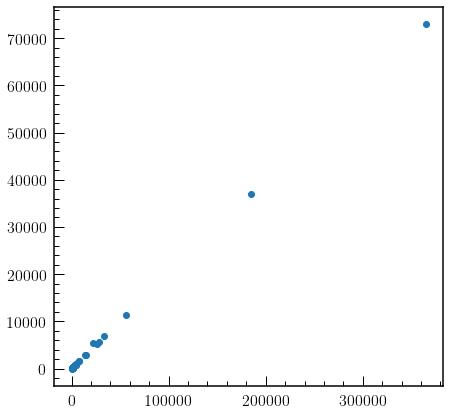

In [14]:
plt.scatter(S_vlass, Serr_vlass)

#plt.xscale("log")
#plt.yscale("log")

The following formula give the VLASS error prior to adding the $20\%$ error in quadrature:

$$ \epsilon = [\epsilon'^2 - (0.2S_{3})^2]^{1/2} $$

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


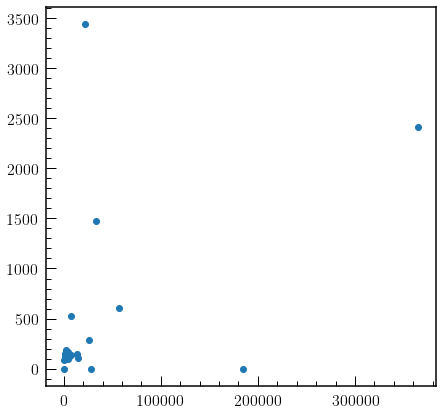

In [15]:
for i in range(len(S_vlass)):
    #ignore the nans and non-detections
    if Serr_vlass[i]>0:
        Serr_vlass[i] = np.sqrt(Serr_vlass[i]**2 - (0.2*S_vlass[i])**2)
        
Serr_vlass

plt.scatter(S_vlass, Serr_vlass)

Now that the extra $20\%$ error has been removed, can check which half of epoch 1 each target was observed in and apply the appropriate correction

In [22]:
for i in range(len(S_vlass)):
    #ignore the nans and non-detections
    if Serr_vlass[i]>0:
        
        #year obs. determines which half of epoch, which determines which correction 
        year = dt.datetime.strptime(vlass_dates[i],'%Y-%m-%d').date().year
        #save "previous" flux to compare with updated version
        Sp = S_vlass[i] 
        
        if year < 2019:
            #VLASS 1.1 peaks are systematically low by ~15%
            S_vlass[i] *= 1.15
            
        else:
            #VLASS 1.2 peaks are systematically low by ~8%
            S_vlass[i] *= 1.08
         
        #Adjust error without VLASS uncertainty in quadrature to match previous 
        #fraction of source's flux density
        Serr_vlass[i] = S_vlass[i] * (Serr_vlass[i]/Sp)
        
        #Regardless, there is a (conservative) ±8% scatter to add in quadrature
        Serr_vlass[i] = np.sqrt(Serr_vlass[i]**2 + (0.08*S_vlass[i])**2)

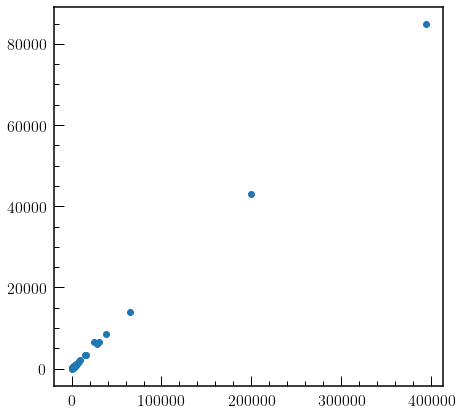

In [23]:
plt.scatter(S_vlass, Serr_vlass)

In [24]:
df["S3_VLASS_final"] = S_vlass
df["S3_quaderr_final"] = Serr_vlass
df.to_csv("all_var_figs.csv", index=False)

Done on 9/1/2020